<a href="https://colab.research.google.com/github/Basitrehmankhattak/coursera-test/blob/main/Deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded = files.upload()

In [6]:
# Step 1: Import pandas
import pandas as pd

# Step 2: Load the dataset
df = pd.read_csv("enron_spam_data.csv")

# Step 3: Combine subject + message into one 'text' column
df["Subject"] = df["Subject"].fillna("")
df["Message"] = df["Message"].fillna("")
df["text"] = df["Subject"] + " " + df["Message"]

# Step 4: Convert 'Spam/Ham' to binary label
df["label"] = df["Spam/Ham"].map({"spam": 1, "ham": 0})

# Step 5: Drop rows with missing values
df.dropna(subset=["text", "label"], inplace=True)

# Step 6: Keep only necessary columns
df = df[["text", "label"]]

# Step 7: Preview
df.head()


<ipython-input-6-429d2bf40003>:5: DtypeWarning: Columns (0,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,2

,text,label
0,christmas tree farm pictures,0.0
1,"vastar resources , inc . gary , production fro...",0.0
2,calpine daily gas nomination - calpine daily g...,0.0
3,re : issue fyi - see note below - already done...,0.0
4,meter 7268 nov allocation fyi .\n- - - - - - -...,0.0


In [7]:
#To double check if Subject + Message were combined into text column
df["text"].head(5)

,text
0,christmas tree farm pictures
1,"vastar resources , inc . gary , production fro..."
2,calpine daily gas nomination - calpine daily g...
3,re : issue fyi - see note below - already done...
4,meter 7268 nov allocation fyi .\n- - - - - - -...


In [8]:
#double check --> Labels were correctly converted (spam → 1, ham → 0)
df["label"].value_counts()

,count
label,
1.0,17171
0.0,16468


In [9]:
#To check --> Missing values
df.isnull().sum()


,0
text,0
label,0


In [10]:
#To check--> Final DataFrame only has 2 columns: text and label
print(df.columns)


Index(['text', 'label'], dtype='object')


In [11]:
import re
import string

# Define a text cleaning function
def clean_email_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove emojis and non-ASCII characters
    text = text.encode('ascii', 'ignore').decode('utf-8')

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply the function to your dataset
df["clean_text"] = df["text"].apply(clean_email_text)

# Show cleaned sample
df[["clean_text", "label"]].head()



,clean_text,label
0,christmas tree farm pictures,0.0
1,vastar resources inc gary production from the ...,0.0
2,calpine daily gas nomination calpine daily gas...,0.0
3,re issue fyi see note below already done stell...,0.0
4,meter nov allocation fyi forwarded by lauri a ...,0.0


In [12]:
df["clean_text"].sample(10).tolist()

['schedule crawler hourahead failure start date hourahead hour hourahead schedule download failed manual intervention required',
 'fw re ivanhoe e s d fyi kim original message from frazier perry sent thursday march pm to lebeau randy watson kimberly abdmoulaie mansoor subject re re ivanhoe e s d just a couple of additional thoughts the cost estimate for esd mods of will typically be about more the e abdmoulaie mansoor frazier perry subject fw re ivanhoe e s d here is an estimate for the upgrade to the ivanhoe esd system please keep in mind that the hp at the location has not been in operation for several years and if it is ever required we may be looking a major expense for that too or original message from jordan fred sent thursday march am to lebeau randy subject re ivanhoe e s d fyi forwarded by fred jordan et s enron on am eddie pool am to fred jordan et s enron enron cc subject re ivanhoe e s d fred here is what i came up with on the ivanhoe station',
 're ea turbine book calgary 

In [13]:
# Check if any rows still contain URLs
df[df["clean_text"].str.contains(r'http|www', na=False)].shape

# Check for HTML tags
df[df["clean_text"].str.contains(r'<.*?>', na=False)].shape

# Check for emails
df[df["clean_text"].str.contains(r'\S+@\S+', na=False)].shape


(0, 3)

In [14]:
df["clean_text_length"] = df["clean_text"].apply(len)
df["clean_text_length"].describe()


,clean_text_length
count,33639.000000
mean,1258.223074
std,1603.521263
min,3.000000
25%,487.000000
50%,837.000000
75%,1479.000000
max,28989.000000


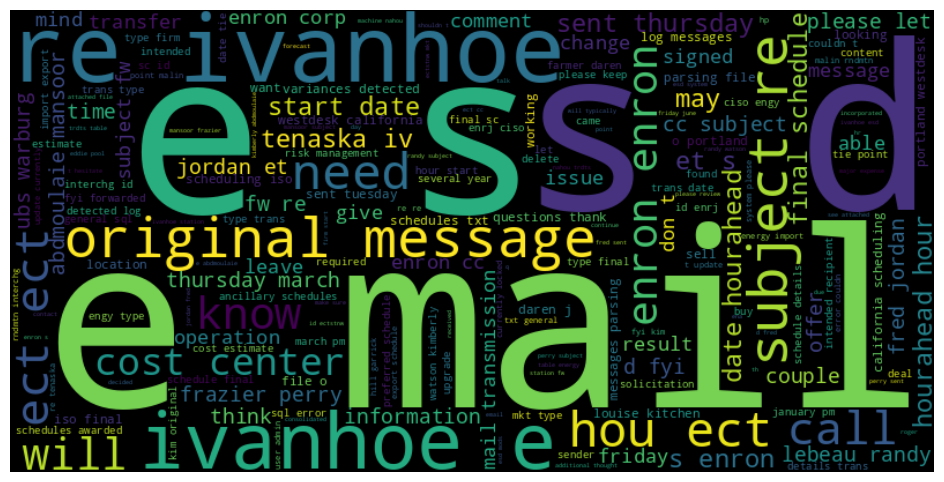

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df["clean_text"].tolist())
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [16]:
df[df["clean_text"].str.strip() == ""].shape



(0, 4)

In [17]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [18]:
# Parameters
vocab_size = 10000  # keep the top 10,000 words
max_length = 500    # max length of each email (truncate/pad to this)
trunc_type = 'post'
padding_type = 'post'
oov_token = "<OOV>"  # out-of-vocabulary token for rare words

# Step 1: Initialize and fit tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(df["clean_text"])

# Step 2: Convert text to sequences
sequences = tokenizer.texts_to_sequences(df["clean_text"])

# Step 3: Pad sequences
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Step 4: Get labels
labels = df["label"].values


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences,
    labels,
    test_size=0.2,
    random_state=42
)

# Optional: check shapes
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (26911, 500) (26911,)
Test shape: (6728, 500) (6728,)


In [20]:
print(padded_sequences[0])


[2480 5530 8268 3483    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Parameters
vocab_size = 10000
embedding_dim = 64
lstm_units = 64

# Build the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),  # Removed input_length to avoid warning
    LSTM(units=lstm_units),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Show the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=5,
    batch_size=128,
    verbose=1
)


Epoch 1/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.5300 - loss: 0.6737 - val_accuracy: 0.5592 - val_loss: 0.6381
Epoch 2/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.5414 - loss: 0.6409 - val_accuracy: 0.5660 - val_loss: 0.6335
Epoch 3/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.5508 - loss: 0.6290 - val_accuracy: 0.5626 - val_loss: 0.6352
Epoch 4/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.5581 - loss: 0.6284 - val_accuracy: 0.6208 - val_loss: 0.5934
Epoch 5/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.6139 - loss: 0.6014 - val_accuracy: 0.8380 - val_loss: 0.3906


211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Accuracy: 0.8379904875148633
Precision: 0.7616444347255631
Recall: 1.0
F1 Score: 0.8646971201588878
ROC AUC Score: 0.8890602694045081


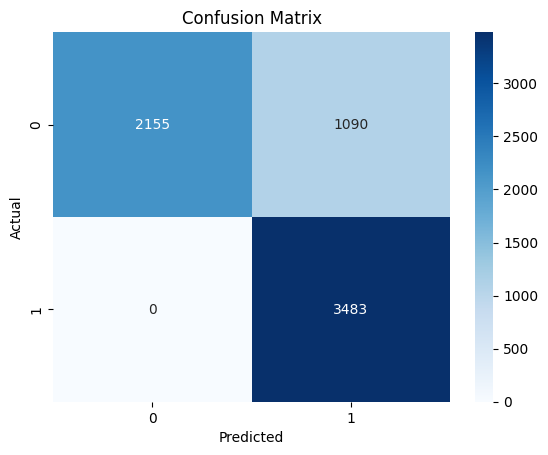


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.66      0.80      3245
         1.0       0.76      1.00      0.86      3483

    accuracy                           0.84      6728
   macro avg       0.88      0.83      0.83      6728
weighted avg       0.88      0.84      0.83      6728



In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Predict on test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Step 2: Print metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_probs))

# Step 3: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 4: Classification Report (optional)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [24]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=15,          # Increased from 5
    batch_size=128,
    verbose=1
)


Epoch 1/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.6677 - loss: 0.5978 - val_accuracy: 0.9964 - val_loss: 0.3866
Epoch 2/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9973 - loss: 0.3144 - val_accuracy: 0.9979 - val_loss: 0.1063
Epoch 3/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9986 - loss: 0.0836 - val_accuracy: 0.9985 - val_loss: 0.0487
Epoch 4/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9988 - loss: 0.0408 - val_accuracy: 0.9993 - val_loss: 0.0232
Epoch 5/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9992 - loss: 0.0214 - val_accuracy: 0.9996 - val_loss: 0.0146
Epoch 6/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9992 - loss: 0.0146 - val_accuracy: 0.9996 - val_loss: 0.0106
Epoch 7/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9992 - loss: 0.0111 - val_accuracy: 0.9996 - val_loss: 0.0085
Epoch 8/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9923 - loss: 0.0364 - val_ac

211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Accuracy: 0.9986623067776457
Precision: 0.9974226804123711
Recall: 1.0
F1 Score: 0.9987096774193548
ROC AUC Score: 0.9988377622854039


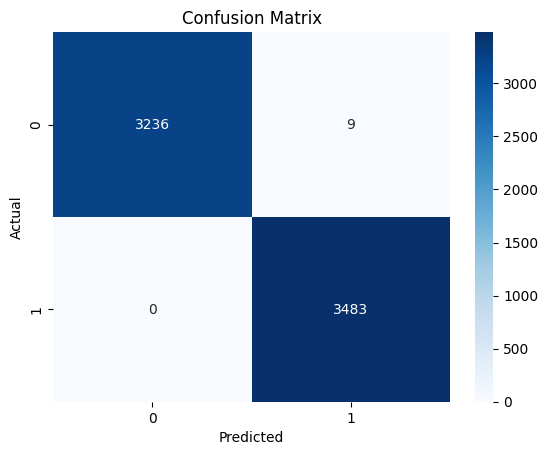

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Print metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_probs))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [26]:
# Save the trained model
model.save("spam_classifier_model.h5")


In [27]:
import pickle

# Save the tokenizer
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)


In [28]:
!ls /content/


enron_spam_data.csv  spam_classifier_model.h5	  spam.csv
sample_data	     spam_classifier_model_v2.h5  tokenizer.pkl


In [29]:
from google.colab import files

files.download("spam_classifier_model.h5")
files.download("tokenizer.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
!ls -l /content/


total 96856
-rw-r--r-- 1 root root 80618951 May  5 04:05 enron_spam_data.csv
drwxr-xr-x 1 root root     4096 Apr 30 13:37 sample_data
-rw-r--r-- 1 root root  8109768 May  5 04:09 spam_classifier_model.h5
-rw-r--r-- 1 root root  8109768 May  5 04:04 spam_classifier_model_v2.h5
-rw-r--r-- 1 root root   480130 May  5 04:04 spam.csv
-rw-r--r-- 1 root root  1845605 May  5 04:09 tokenizer.pkl


In [31]:
!pip install streamlit
!npm install -g localtunnel


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 136.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 102.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 9.0 MB/s eta 0:00:00
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼
added 22 packages in 3s
⠼
⠼3 packages are looking for funding
⠼  run `npm fund` for details
⠼

In [32]:
from tensorflow.keras.models import load_model
import pickle

# Load existing model
model = load_model("/content/spam_classifier_model.h5")

# Load tokenizer
with open("/content/tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)


In [33]:
import pandas as pd
import re

# Load SMS dataset
df_sms = pd.read_csv("/content/spam.csv", encoding='latin-1')
df_sms = df_sms.rename(columns={"Category": "label", "Message": "text"})
df_sms = df_sms[["label", "text"]]
df_sms["label"] = df_sms["label"].map({"ham": 0, "spam": 1})

# Clean text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation/emojis
    text = re.sub(r'\d+', '', text)      # remove numbers
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df_sms["clean_text"] = df_sms["text"].apply(clean_text)



In [34]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Convert SMS text to sequences using the same tokenizer
sequences_sms = tokenizer.texts_to_sequences(df_sms["clean_text"])
padded_sms = pad_sequences(sequences_sms, maxlen=500, padding='post', truncating='post')

# Labels
labels_sms = np.array(df_sms["label"])


In [35]:
from tensorflow.keras.models import load_model

# 1. Load the model
model = load_model("/content/spam_classifier_model.h5")

# 2. Recompile it explicitly
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [41]:
history = model.fit(
    padded_sms,
    labels_sms,
    epochs=20,
    batch_size=64,
    validation_split=0.1
)


Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9969 - loss: 0.0160 - val_accuracy: 0.9695 - val_loss: 0.1129
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9929 - loss: 0.0246 - val_accuracy: 0.9821 - val_loss: 0.0610
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9960 - loss: 0.0158 - val_accuracy: 0.9910 - val_loss: 0.0439
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9973 - loss: 0.0117 - val_accuracy: 0.9839 - val_loss: 0.0529
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9984 - loss: 0.0112 - val_accuracy: 0.9839 - val_loss: 0.0604
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9958 - loss: 0.0165 - val_accuracy: 0.9803 - val_loss: 0.0717
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9970 - loss: 0.0142 - val_accuracy: 0.9892 - val_loss: 0.0480
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9971 - loss: 0.0142 - val_accuracy: 0.9892 - v

In [42]:
# Save the improved model
model.save("spam_classifier_model_v2.h5")

# Download it to your PC
from google.colab import files
files.download("spam_classifier_model_v2.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
model.save("spam_classifier_model_v3.h5")
from google.colab import files
files.download("spam_classifier_model_v3.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>